## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  66.946792   221.740117  0.457849   7.390961  1.006617
1  75.008745   391.111722  0.121898   2.107188  0.697106
2  46.660329  1411.503372  0.732866   1.830018  1.385636
3  12.355438   922.848728  0.876223  10.688003  1.466499
4  38.644816  1450.249083  0.322015   3.447681  1.629773


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8998685	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.8902184	total: 69.8ms	remaining: 34.8s
2:	learn: 0.8808883	total: 70.3ms	remaining: 23.4s
3:	learn: 0.8723699	total: 70.9ms	remaining: 17.6s
4:	learn: 0.8643423	total: 71.4ms	remaining: 14.2s
5:	learn: 0.8562044	total: 72ms	remaining: 11.9s
6:	learn: 0.8490324	total: 72.4ms	remaining: 10.3s
7:	learn: 0.8403163	total: 73.1ms	remaining: 9.06s
8:	learn: 0.8313265	total: 73.6ms	remaining: 8.11s
9:	learn: 0.8224451	total: 74.2ms	remaining: 7.34s
10:	learn: 0.8154217	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8068658	total: 75.1ms	remaining: 6.18s
12:	learn: 0.7999507	total: 75.6ms	remaining: 5.74s
13:	learn: 0.7917254	total: 76ms	remaining: 5.35s
14:	learn: 0.7847758	total: 76.4ms	remaining: 5.02s
15:	learn: 0.7776089	total: 76.9ms	remaining: 4.73s
16:	learn: 0.7702830	total: 77.3ms	remaining: 4.47s
17:	learn: 0.7644326	total: 77.7ms	remaining: 4.24s
18:	learn: 0.7596173	total: 78.1ms	remaining: 4.

92:	learn: 0.4160346	total: 109ms	remaining: 1.06s
93:	learn: 0.4127086	total: 109ms	remaining: 1.05s
94:	learn: 0.4101971	total: 110ms	remaining: 1.04s
95:	learn: 0.4068110	total: 110ms	remaining: 1.04s
96:	learn: 0.4032598	total: 111ms	remaining: 1.03s
97:	learn: 0.4003151	total: 111ms	remaining: 1.02s
98:	learn: 0.3973767	total: 111ms	remaining: 1.01s
99:	learn: 0.3943909	total: 112ms	remaining: 1s
100:	learn: 0.3919449	total: 112ms	remaining: 997ms
101:	learn: 0.3892096	total: 112ms	remaining: 990ms
102:	learn: 0.3868423	total: 113ms	remaining: 983ms
103:	learn: 0.3847276	total: 113ms	remaining: 976ms
104:	learn: 0.3816762	total: 114ms	remaining: 969ms
105:	learn: 0.3789416	total: 114ms	remaining: 962ms
106:	learn: 0.3759208	total: 114ms	remaining: 955ms
107:	learn: 0.3731612	total: 115ms	remaining: 949ms
108:	learn: 0.3707592	total: 115ms	remaining: 942ms
109:	learn: 0.3676259	total: 116ms	remaining: 936ms
110:	learn: 0.3654730	total: 116ms	remaining: 930ms
111:	learn: 0.3633550	t

271:	learn: 0.1607939	total: 187ms	remaining: 499ms
272:	learn: 0.1600572	total: 187ms	remaining: 498ms
273:	learn: 0.1592338	total: 188ms	remaining: 497ms
274:	learn: 0.1586574	total: 188ms	remaining: 495ms
275:	learn: 0.1579344	total: 188ms	remaining: 494ms
276:	learn: 0.1572275	total: 189ms	remaining: 492ms
277:	learn: 0.1566487	total: 189ms	remaining: 491ms
278:	learn: 0.1560728	total: 189ms	remaining: 489ms
279:	learn: 0.1555628	total: 190ms	remaining: 488ms
280:	learn: 0.1547881	total: 190ms	remaining: 487ms
281:	learn: 0.1542282	total: 190ms	remaining: 485ms
282:	learn: 0.1536299	total: 191ms	remaining: 484ms
283:	learn: 0.1530057	total: 191ms	remaining: 482ms
284:	learn: 0.1524301	total: 192ms	remaining: 481ms
285:	learn: 0.1516501	total: 192ms	remaining: 479ms
286:	learn: 0.1508805	total: 192ms	remaining: 478ms
287:	learn: 0.1502930	total: 193ms	remaining: 476ms
288:	learn: 0.1498181	total: 193ms	remaining: 475ms
289:	learn: 0.1492968	total: 194ms	remaining: 474ms
290:	learn: 

507:	learn: 0.0728803	total: 291ms	remaining: 282ms
508:	learn: 0.0726728	total: 291ms	remaining: 281ms
509:	learn: 0.0724219	total: 292ms	remaining: 280ms
510:	learn: 0.0723397	total: 292ms	remaining: 279ms
511:	learn: 0.0721338	total: 293ms	remaining: 279ms
512:	learn: 0.0720819	total: 293ms	remaining: 278ms
513:	learn: 0.0718300	total: 294ms	remaining: 278ms
514:	learn: 0.0715615	total: 294ms	remaining: 277ms
515:	learn: 0.0713269	total: 294ms	remaining: 276ms
516:	learn: 0.0711290	total: 295ms	remaining: 275ms
517:	learn: 0.0710497	total: 295ms	remaining: 275ms
518:	learn: 0.0707908	total: 295ms	remaining: 274ms
519:	learn: 0.0705476	total: 296ms	remaining: 273ms
520:	learn: 0.0703567	total: 296ms	remaining: 272ms
521:	learn: 0.0702791	total: 296ms	remaining: 271ms
522:	learn: 0.0700423	total: 297ms	remaining: 271ms
523:	learn: 0.0699661	total: 297ms	remaining: 270ms
524:	learn: 0.0697620	total: 298ms	remaining: 269ms
525:	learn: 0.0696866	total: 298ms	remaining: 269ms
526:	learn: 

682:	learn: 0.0486193	total: 369ms	remaining: 171ms
683:	learn: 0.0485925	total: 370ms	remaining: 171ms
684:	learn: 0.0485661	total: 370ms	remaining: 170ms
685:	learn: 0.0485128	total: 370ms	remaining: 170ms
686:	learn: 0.0483363	total: 371ms	remaining: 169ms
687:	learn: 0.0481815	total: 371ms	remaining: 168ms
688:	learn: 0.0480626	total: 372ms	remaining: 168ms
689:	learn: 0.0479109	total: 372ms	remaining: 167ms
690:	learn: 0.0477934	total: 372ms	remaining: 166ms
691:	learn: 0.0477674	total: 373ms	remaining: 166ms
692:	learn: 0.0477417	total: 373ms	remaining: 165ms
693:	learn: 0.0477163	total: 373ms	remaining: 165ms
694:	learn: 0.0475434	total: 374ms	remaining: 164ms
695:	learn: 0.0474943	total: 374ms	remaining: 163ms
696:	learn: 0.0473275	total: 374ms	remaining: 163ms
697:	learn: 0.0473026	total: 375ms	remaining: 162ms
698:	learn: 0.0471341	total: 375ms	remaining: 162ms
699:	learn: 0.0470941	total: 375ms	remaining: 161ms
700:	learn: 0.0469320	total: 376ms	remaining: 160ms
701:	learn: 

910:	learn: 0.0307234	total: 473ms	remaining: 46.2ms
911:	learn: 0.0306907	total: 473ms	remaining: 45.7ms
912:	learn: 0.0306328	total: 474ms	remaining: 45.1ms
913:	learn: 0.0305910	total: 474ms	remaining: 44.6ms
914:	learn: 0.0304905	total: 475ms	remaining: 44.1ms
915:	learn: 0.0304152	total: 475ms	remaining: 43.6ms
916:	learn: 0.0303416	total: 475ms	remaining: 43ms
917:	learn: 0.0303256	total: 476ms	remaining: 42.5ms
918:	learn: 0.0302492	total: 476ms	remaining: 42ms
919:	learn: 0.0302335	total: 476ms	remaining: 41.4ms
920:	learn: 0.0301706	total: 477ms	remaining: 40.9ms
921:	learn: 0.0301551	total: 477ms	remaining: 40.4ms
922:	learn: 0.0300735	total: 478ms	remaining: 39.8ms
923:	learn: 0.0299727	total: 478ms	remaining: 39.3ms
924:	learn: 0.0299231	total: 478ms	remaining: 38.8ms
925:	learn: 0.0298742	total: 479ms	remaining: 38.2ms
926:	learn: 0.0298346	total: 479ms	remaining: 37.7ms
927:	learn: 0.0297955	total: 480ms	remaining: 37.2ms
928:	learn: 0.0296987	total: 480ms	remaining: 36.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

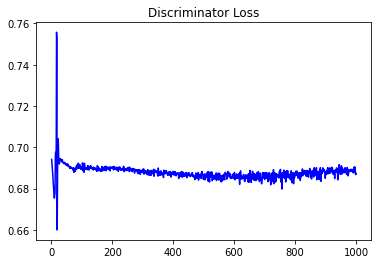

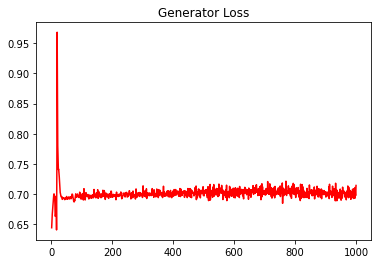

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.761606291199562


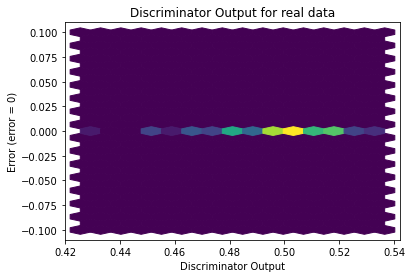

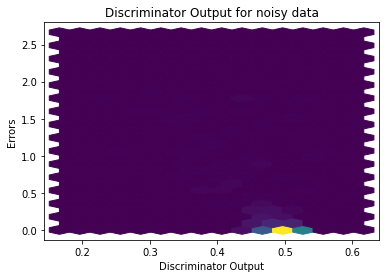

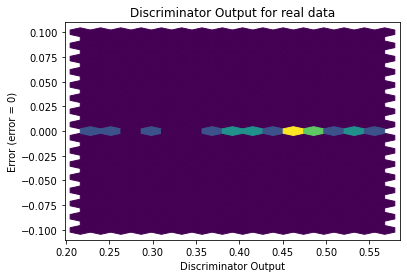

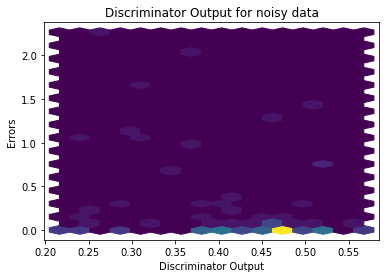

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


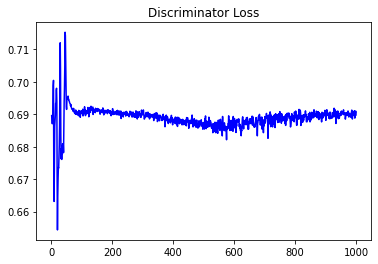

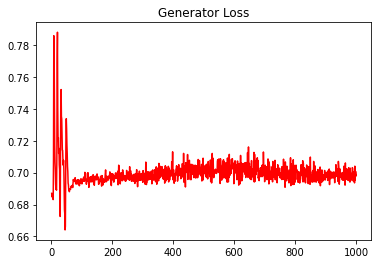

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6808693784113174


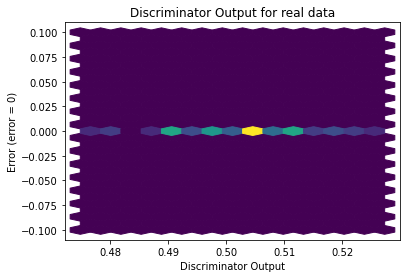

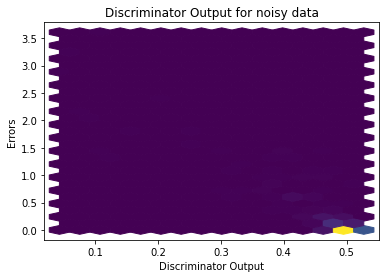

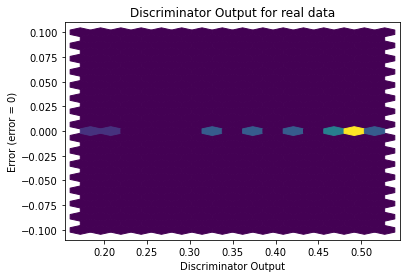

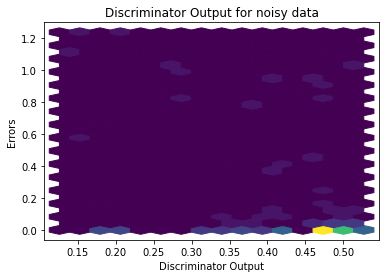

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9005]], requires_grad=True)
